# Exploratory analysis of quoted speech

In [103]:
from collections import Counter
import pandas as pd
%matplotlib inline
from pylab import rcParams
from bs4 import BeautifulSoup
import textacy
rcParams['figure.figsize'] = 10, 4

In [1]:
import spacy
nlp = spacy.load('en')

In [7]:
with open('pride.txt') as f: 
    pride = f.read()

In [9]:
doc = nlp(pride)

In [7]:
def proportionWithTag(doc, tag):
    """ Returns the proportion of words in the document that have a certain POS tag. 
    If given a list instead of a tag, returns the proportions of words in the document 
    that have those tags."""
    totalWords = len(doc)
    if type(tag) == list: 
        wordsWithTag = [word for word in doc if word.tag_ in tag]
    else: 
        wordsWithTag = [word for word in doc if word.tag_ == tag]
    return len(wordsWithTag)/totalWords

def proportionWithLemma(doc, lemma): 
    totalWords = len(doc)
    wordsWithLemma = [word for word in doc if word.lemma_ == lemma]
    return len(wordsWithLemma)/totalWords

In [8]:
def beProportion(doc): 
    totalWords = len(doc)
    bes = [word for word in doc if word.lemma_ == 'be' and word.tag_ in verbtags] # 488 is "be" 
    return len(bes)/totalWords


From the Penn Treebank table: 
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

27. 	VB 	Verb, base form
28. 	VBD 	Verb, past tense
29. 	VBG 	Verb, gerund or present participle
30. 	VBN 	Verb, past participle
31. 	VBP 	Verb, non-3rd person singular present
32. 	VBZ 	Verb, 3rd person singular present 

In [149]:
presentVerbTags = ['VB', 'VBG', 'VBP', 'VBZ']
verbtags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

In [83]:
[proportionWithTag(x, presentVerbTags) for x in [doc, quoted]]

[0.07910406178526769, 0.12875536480686695]

In [59]:
VBZproportion(doc)

0.009692823034708859

In [60]:
VBZproportion(sent0)

0.03571428571428571

# Pride and Prejudice Highlights

Scraped from: https://kindle.amazon.com/work/pride-prejudice-jane-austen-ebook/B00K1K87SQ/B008476HBM
and from: https://web.archive.org/web/20140821065046/https://kindle.amazon.com/work/pride-prejudice-jane-austen-ebook/B000AGXUCE/B000JMLFLW

>It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.

11996 Highlighters

>Pride relates more to our opinion of ourselves, vanity to what we would have others think of us."

11799 Highlighters

>In vain I have struggled. It will not do. My feelings will not be repressed. You must allow me to tell you how ardently I admire and love you.

5841 Highlighters

>Happiness in marriage is entirely a matter of chance. If the dispositions of the parties are ever so well known to each other or ever so similar beforehand, it does not advance their felicity in the least. They always continue to grow sufficiently unlike afterwards to have their share of vexation; and it is better to know as little as possible of the defects of the person with whom you are to pass your life."

5788 Highlighters

>There are few people whom I really love, and still fewer of whom I think well. The more I see of the world, the more am I dissatisfied with it; and every day confirms my belief of the inconsistency of all human characters, and of the little dependence that can be placed on the appearance of merit or sense.

5290 Highlighters

Popular Highlights

>there are very few of us who have heart enough to be really in love without encouragement.

8300 Highlighters

>Vanity and pride are different things, though the words are often used synonymously. A person may be proud without being vain. Pride relates more to our opinion of ourselves, vanity to what we would have others think of us."

7627 Highlighters

>"Pride," observed Mary, who piqued herself upon the solidity of her reflections, "is a very common failing,

5494 Highlighters


In [12]:
quoted_passages = ["""It is a truth universally acknowledged, 
 that a single man in possession of a good fortune, must be in want of a wife.""",
"""In vain I have struggled. It will not do. My feelings will not be repressed. 
You must allow me to tell you how ardently I admire and love you.""",
"""Happiness in marriage is entirely a matter of chance. If the dispositions of the parties are ever 
so well known to each other or ever so similar beforehand, 
it does not advance their felicity in the least. 
They always continue to grow sufficiently unlike afterwards to have their share of vexation; 
and it is better to know as little as possible of the defects of the person with whom you are to pass your life.""",
"""There are few people whom I really love, and still fewer of whom I think well. 
The more I see of the world, the more am I dissatisfied with it; 
and every day confirms my belief of the inconsistency of all human characters, 
and of the little dependence that can be placed on the appearance of merit or sense.""",
""""Pride," observed Mary, who piqued herself upon the solidity of her reflections, "is a very common failing,""",
"""Vanity and pride are different things, though the words are often used synonymously. 
A person may be proud without being vain. Pride relates more to our opinion of ourselves, 
vanity to what we would have others think of us."""
]

In [13]:
joined = ' '.join(quoted_passages)

In [14]:
quoted = nlp(joined)

In [15]:
tagDict = {"CC": "Coordinating conjunction",
"DT": "Determiner",
"EX": "Existential there",
"IN": "Preposition or subordinating conjunction",
"JJ": "Adjective",
"JJR": "Adjective, comparative",
"JJS": "Adjective, superlative",
"MD": "Modal",
"NN": "Noun, singular or mass",
"NNS": "Noun, plural",
"NNP": "Proper noun, singular",
"NNPS": "Proper noun, plural",
"PDT": "Predeterminer",
"POS": "Possessive ending",
"PRP": "Personal pronoun",
"PRP$": "Possessive pronoun",
"RB": "Adverb",
"RBR": "Adverb, comparative",
"RBS": "Adverb, superlative",
"RP": "Particle",
"TO": "to",
"UH": "Interjection",
"VB": "Verb, base form",
"VBD": "Verb, past tense",
"VBG": "Verb, gerund or present participle",
"VBN": "Verb, past participle",
"VBP": "Verb, non-3rd person singular present",
"VBZ": "Verb, 3rd person singular present",
"WDT": "Wh-determiner",
"WP": "Wh-pronoun",
"WP$": "Possessive wh-pronoun",
"WRB": "Wh-adverb"}

In [16]:
tagset = list(tagDict.keys())

In [17]:
def compareTags(a, b, tagset):
    proportionsDict = {}
    for tag in tagset: 
        proportionsDict[tag] = [proportionWithTag(x, tag) for x in [a, b]]
    df = pd.DataFrame(proportionsDict).T
    df['factor'] = df[1]/df[0]
    df['factor'].plot(kind="bar")

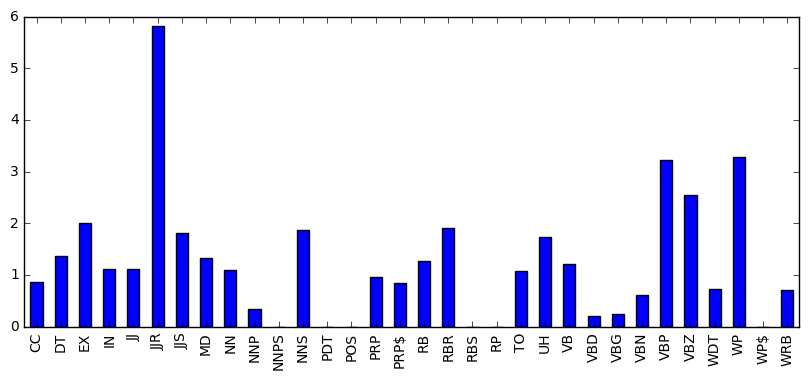

In [18]:
compareTags(doc, quoted, tagset)

In [19]:
def compareLemmas(a, b, lemmas):
    proportionsDict = {}
    for lemma in lemmas: 
        proportionsDict[lemma] = [proportionWithLemma(x, lemma) for x in [a, b]]
    df = pd.DataFrame(proportionsDict).T
    df['factor'] = df[1]/df[0]
    df['factor'].plot(kind="bar")

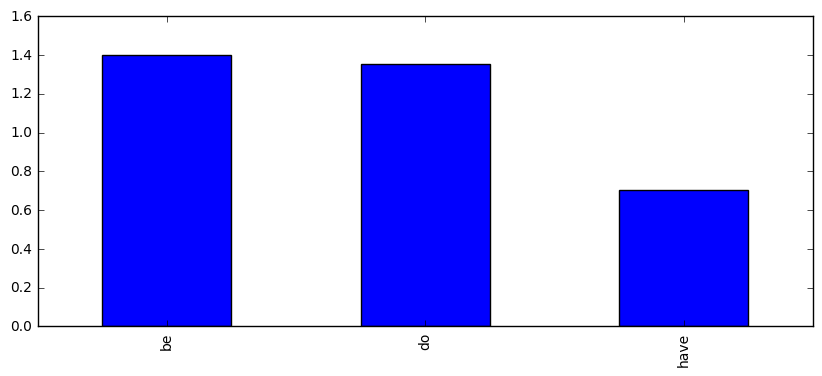

In [20]:
compareLemmas(doc, quoted, ['be', 'have', 'do'])

In [21]:
# Read annotated edition of Middlemarch
with open('annotated.html') as f: 
    annotated = f.read()

In [22]:
# Parse 
soup = BeautifulSoup(annotated, 'lxml')

levels = [soup.find_all('span', 'c-'+str(level)) for level in range(17)]

# Remove HTML tags. 
cleanLevels = []
for level in levels: 
    cleanLevel = [quote.get_text() for quote in level]
    cleanLevels.append(cleanLevel)

In [131]:
def getQuotes(cleanLevels, n): 
    """ Get quotes from list, according to n times they are quoted. """
    quotedGroups = cleanLevels[n:]
    quoted = []
    for group in quotedGroups: 
        quoted.extend(group)
    quoted = ' '.join(quoted)
    return quoted

In [150]:
unquoted = cleanLevels[0]
quotedGroups = cleanLevels[1:]
quoted = []
for group in quotedGroups: 
    quoted.extend(group)
quotes = ' '.join(quoted)
nonquotes = ' '.join(unquoted)

In [151]:
quotes5 = getQuotes(cleanLevels, 5)
quotes8 = getQuotes(cleanLevels, 8)

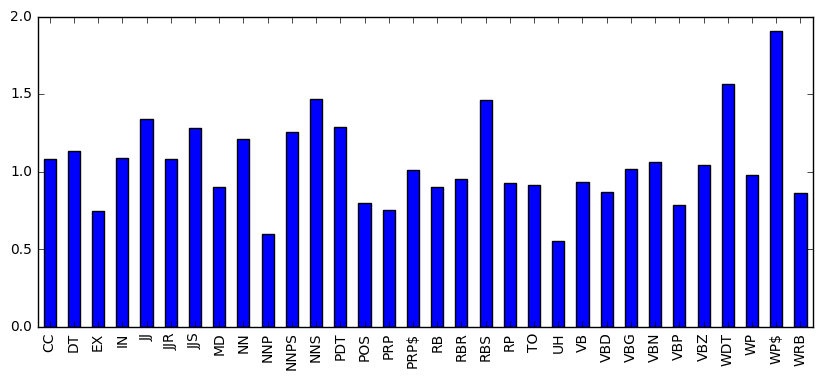

In [29]:
compareTags(nonquotes, quotes, tagset)

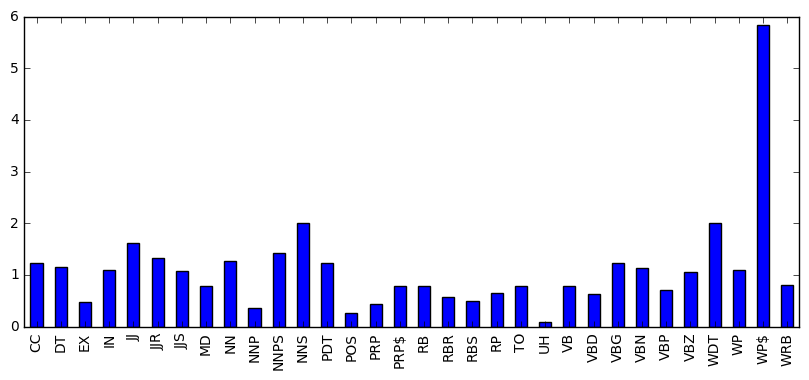

In [47]:
compareTags(nonquotes, quotes5, tagset)

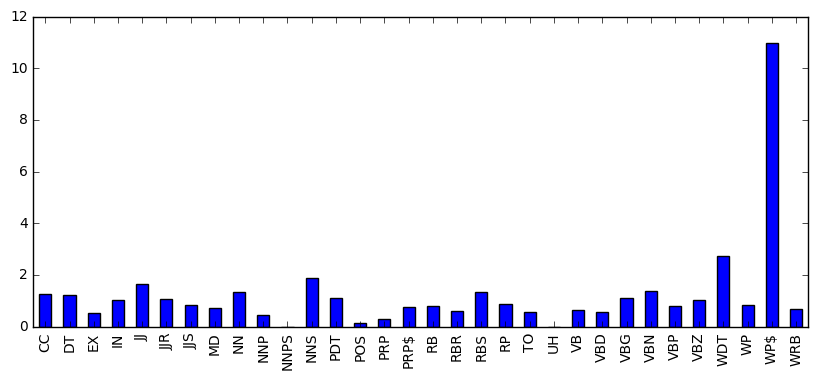

In [50]:
compareTags(nonquotes, quotes8, tagset)

In [245]:
tagDict['WDT']

'Wh-determiner'

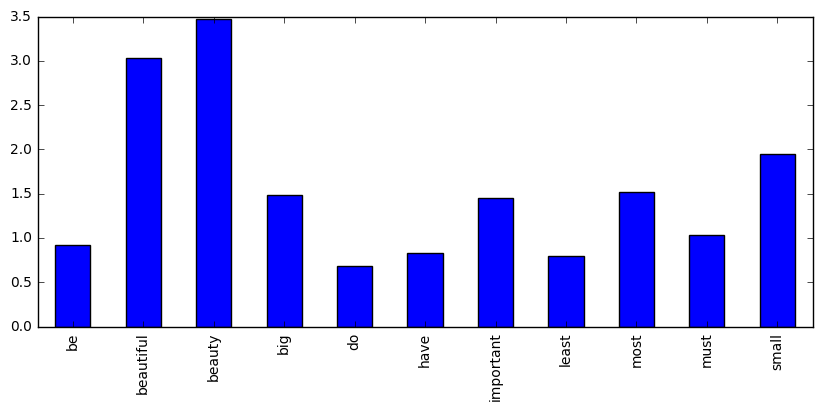

In [51]:
compareLemmas(nonquotes, quotes, ['be', 'have','do',
                                  'must', 'most', 'least', 'important',
                                 'beautiful', 'beauty', 'big', 'small'])

In [89]:
def compareAllLemmas(a, b): 
    lemmasA = pd.Series(Counter([word.lemma_ for word in a]))
    lemmasB = pd.Series(Counter([word.lemma_ for word in b]))
#     df = pd.concat([lemmasA, lemmasB], axis=1).fillna(0)
    return lemmasA, lemmasB

In [91]:
sa, sb = compareAllLemmas(nonquotes, quotes8)

In [100]:
df = pd.concat([sa, sb], axis=1).fillna(0)

In [123]:
# quotesBag = quotes8.to_bag_of_terms(lemmatize=True, weighting='freq', as_strings=True)

def bagOfTerms(doc): 
    bag = doc.to_bag_of_terms(lemmatize=True, weighting='freq', as_strings=True)
    return pd.Series(bag)

In [152]:
nonquotesDoc = textacy.Doc(nonquotes)
quotesDoc = textacy.Doc(quotes)
quotes5Doc = textacy.Doc(quotes5)
quotes8Doc = textacy.Doc(quotes8)

In [153]:
nonquotesBag = bagOfTerms(nonquotesDoc)
quotesBag = bagOfTerms(quotesDoc)
quotes5Bag = bagOfTerms(quotes5Doc)
quotes8Bag = bagOfTerms(quotes8Doc)

In [167]:
def compareAllLemmas(a, b): 
    """ Compares two bags of terms. """
    df = pd.concat([a, b], axis=1).fillna(0)
    delta = df[0] - df[1]
    return delta.sort_values()

In [172]:
df = compareAllLemmas(quotesBag, nonquotesBag)

In [173]:
df

say             -0.003908
mr.             -0.002463
lydgate         -0.002194
fred            -0.001954
bulstrode       -0.001712
mary            -0.001311
rosamond        -0.001070
mrs.            -0.001058
celia           -0.001023
not             -0.000978
garth           -0.000973
farebrother     -0.000968
's              -0.000907
james           -0.000898
brooke          -0.000878
vincy           -0.000618
'               -0.000607
ladislaw        -0.000601
casaubon        -0.000560
raffles         -0.000553
middlemarch     -0.000552
sir             -0.000537
wish            -0.000512
speak           -0.000475
come            -0.000474
go              -0.000473
featherstone    -0.000470
shall           -0.000469
caleb           -0.000446
tell            -0.000437
                   ...   
marriage         0.000245
large            0.000263
deep             0.000265
little           0.000266
heart            0.000268
mind             0.000268
self             0.000269
struggle    